Les données de vente d'une société de smartphone et de gadgets nous a sollicité pour améliorer son business. Cette société nous a remis 12 fichiers csv représentant chacun les ventes mensuelles d’un mois de l’année. Elle nous a posé les questions suivantes : 

-	Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d’affaires ?
  
-	Dans quelle ville nous avons enregistré un maximum de commandes ?
  
-	A quelle période doit-on faire une campagne publicitaire améliorer les ventes ?
  
-	Quel est le produit qui réalise le plus de vente ?
  
-	Quelles sont les combinaisons de produits qui se vendent le plus ?
  
Nous répondrons à toutes ces questions aussi clairement que possible en utilisant le langage Python, nous ferons également un rapport détaillé pour présenter les résultats et récommandations.


In [1]:

# importation des bibliothèques

import os     # pour explorer plusieurs fichiers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [2]:
# créons une liste de nos fichiers 
files = [file for file in os.listdir(r'G:\Mon Drive\data\PYTHON\Projet_Analyse_des_ventes\données_du_client')]
print (files)

['Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_May_2019.csv', 'Sales_March_2019.csv', 'Sales_June_2019.csv', 'Sales_July_2019.csv', 'Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_December_2019.csv', 'Sales_August_2019.csv', 'Sales_April_2019.csv', 'all_data.csv']


In [3]:
# chemin des fichiers
path = r'G:\Mon Drive\data\PYTHON\Projet_Analyse_des_ventes\données_du_client'

#créeons une base de données vide
all_data = pd.DataFrame()

# Ajoutons à présent dans la bd précédente, toutes les informations de nos fichiers,
# comme ils ont les memes colonnes, nous allons les concatener
for file in files:
    current_data = pd.read_csv(path + '/'+ file)
    all_data = pd.concat([all_data, current_data], ignore_index=True)
print(all_data)

       Order ID                   Product Quantity Ordered Price Each  \
0        248151     AA Batteries (4-pack)                4       3.84   
1        248152      USB-C Charging Cable                2      11.95   
2        248153      USB-C Charging Cable                1      11.95   
3        248154          27in FHD Monitor                1     149.99   
4        248155      USB-C Charging Cable                1      11.95   
...         ...                       ...              ...        ...   
747395   194090              Google Phone                1        600   
747396   194091     AA Batteries (4-pack)                1       3.84   
747397   194092    AAA Batteries (4-pack)                2       2.99   
747398   194093     AA Batteries (4-pack)                1       3.84   
747399   194094  Lightning Charging Cable                1      14.95   

            Order Date                        Purchase Address  
0       09/17/19 14:44     380 North St, Los Angeles, CA 9

In [4]:

# Enregistrons all_data sous forme de fichier csv dans le meme emplacement que les autres fichiers

all_data.to_csv(path + '/all_data.csv', index = False)

In [5]:

# Analysons le types des variables, sont-elles au bon format ?
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:

# Prennons les informations sur notre df

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747400 entries, 0 to 747399
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          745220 non-null  object
 1   Product           745220 non-null  object
 2   Quantity Ordered  745220 non-null  object
 3   Price Each        745220 non-null  object
 4   Order Date        745220 non-null  object
 5   Purchase Address  745220 non-null  object
dtypes: object(6)
memory usage: 34.2+ MB


In [7]:

# Affichons les 5 premières lignes

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [8]:

# Identifions le nombre de valeurs manquantes

all_data.isnull().sum()

Order ID            2180
Product             2180
Quantity Ordered    2180
Price Each          2180
Order Date          2180
Purchase Address    2180
dtype: int64

In [9]:

# supprimons les valeurs manquantes car elles ne représentent pas grand chose sur l'immensité des données 

all_data = all_data.dropna(how = 'all')

all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:

#Renommons ces variables pour les rendres plus typiques

df = all_data
df.rename(columns={'Order ID': 'Order_ID'}, inplace=True)
df.rename(columns={'Price Each': 'Price_Each'}, inplace=True)
df.rename(columns={'Order Date': 'Order_Date'}, inplace=True)
df.rename(columns={'Purchase Address': 'Address'}, inplace=True)

In [11]:
df.rename(columns={'Quantity Ordered': 'Quantity'}, inplace=True)
print(df.columns)

Index(['Order_ID', 'Product', 'Quantity', 'Price_Each', 'Order_Date',
       'Address'],
      dtype='object')


In [12]:
# Changeons le type des variables 

df['Order_ID'] = pd.to_numeric(df['Order_ID'], errors='coerce').astype('Int64') 
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('Int64')
df['Price_Each'] = pd.to_numeric(df['Price_Each'], errors='coerce')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\1814689038.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


In [13]:

# Vérifions si les variables sont désormais sur le bon format 

df.dtypes

Order_ID               Int64
Product               object
Quantity               Int64
Price_Each           float64
Order_Date    datetime64[ns]
Address               object
dtype: object

# 1) Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d’affaire ?

In [14]:

#Créeons une colonne month pour les mois 

df['mois'] = df['Order_Date'].dt.month
df['mois'].head()
df['month'] = df['mois']
df.drop(columns=['mois'], inplace=True)
df.rename ( columns = {'month' : 'Month'} , inplace = True) 
df.head()

,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9.0
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9.0
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9.0
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9.0
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9.0


In [15]:

# Affichons les mois existants 
df['Month'].unique()

# On constate qu'il ya des mois 'nan' , ca ne nous convient pas, cela biaiserais notre analyse

array([ 9., 10., nan, 11., 12.,  5.,  6.,  3.,  4.,  7.,  8.,  1.,  2.])

In [16]:
# Regardons de plus près les lignes dont le mois est 'nan'

df[df['Month'].isnull()]
# Nous preferons retirer ces mois de notre variable Month

,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month
1679,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
3732,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
3790,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
4323,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
5579,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
...,...,...,...,...,...,...,...
744297,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
746225,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
746341,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN
746356,<NA>,Product,<NA>,NaN,NaT,Purchase Address,NaN


In [17]:
#Nous allons à présent supprimer 'nan' de notre liste de mois 

unique_months = df['Month'].dropna().unique()
print(unique_months)

[ 9. 10. 11. 12.  5.  6.  3.  4.  7.  8.  1.  2.]


In [18]:

#df['Month'].dtypes

# Pour une meilleure présentation , nous allons mettre les mois au type entier et supprimer les lignes de mois nuls

# Supprimer les lignes avec des NaN
df_clean = df.dropna(subset=['Month'])

# Convertir en type int
df_clean['Month'] = df_clean['Month'].astype(int)

df_clean.head()
df_clean.iloc[1679]


C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\1052621157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['Month'].astype(int)


Order_ID                                   249766
Product                                    iPhone
Quantity                                        1
Price_Each                                  700.0
Order_Date                    2019-09-30 17:21:00
Address       864 Maple St, Los Angeles, CA 90001
Month                                           9
Name: 1686, dtype: object

In [19]:

'''A présent que nous avons les mois, il nous faut le chiffre d'affaire généré chaque mois, pour cela nous 
créerons une colonne total_price pour donner le prix de vente de chaque produit, en effet, total_price = 
price_each * quantity '''

dff = df_clean 
dff['Total_price'] = dff['Price_Each'] * dff['Quantity']
dff.head()

C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\3452630489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Total_price'] = dff['Price_Each'] * dff['Quantity']


,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month,Total_price
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.9
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95


In [20]:

# dff['Total_price'].dtypes

# Regroupons à présent les prix totaux par mois , en d'autre termes, cherchons le chiffre d'affaire mensuel

monthly_sales = dff.groupby('Month')['Total_price'].sum()
monthly_sales

Month
1      7289026.92
2      8808089.68
3     11228401.52
4     13562680.96
5      12610427.0
6     10311209.04
7     10591103.04
8      8977871.52
9      8390240.52
10    14946907.52
11     12798412.8
12    18453773.36
Name: Total_price, dtype: Float64

C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\1379895968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues_d')


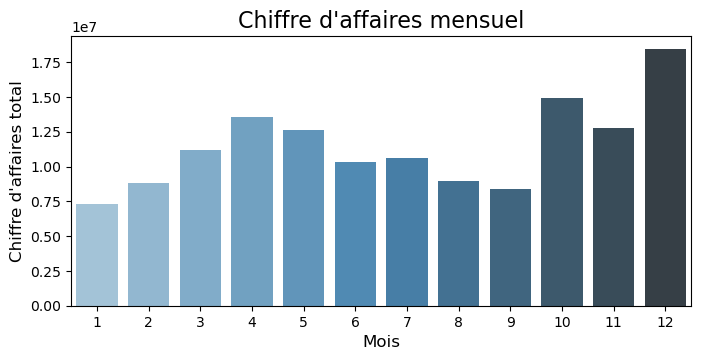

In [21]:

# Créer un graphique en barres
plt.figure(figsize=(8, 3.5))  # Définir la taille de la figure
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues_d')

# Ajouter des labels et un titre
plt.title('Chiffre d\'affaires mensuel', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Chiffre d\'affaires total', fontsize=12)
plt.show()

## Nous pouvons conclure que le mois avec le plus de vente est le mois de Decembre, Aussi, nous remarquons que les mois de 10 à 12 ont un meilleur chiffre d'affaire, cela est certainement du à l'approche de noèl, d'ou il est important d'avoir une stratégie pour tirer parti de cette information, nous nous ferons un plaisir de détailler quelques recommandations dans notre rapport. 

# 2) Dans quelle ville nous avons enregistré un maximum de commandes ? 

In [22]:
dff.head()

,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month,Total_price
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.9
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95


In [23]:

# Nous allons commencer par extraire le nom de la ville dans chaque addresse et de les mettre dans une colonne City.

dff['City'] = dff['Address'].str.split(',', expand=True)[1].str.strip()
dff.head()

C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\1660246343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['City'] = dff['Address'].str.split(',', expand=True)[1].str.strip()


,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month,Total_price,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.9,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [24]:

# Comptons à présent le nombre de commandes dans chaque ville

City_order = dff.groupby('City')['Order_ID'].count()
City_order

City
Atlanta           59524
Austin            39620
Boston            79736
Dallas            59280
Los Angeles      118420
New York City     99504
Portland          49860
San Francisco    178928
Seattle           58928
Name: Order_ID, dtype: Int64

C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\3908136703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=City_order.index, y=City_order.values, palette='viridis')


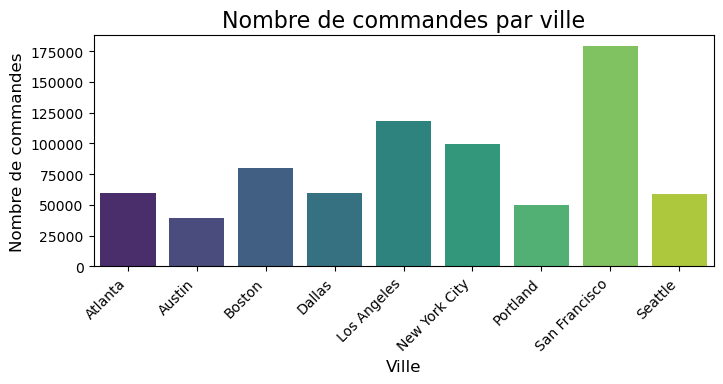

In [25]:

# Nous créerons un graphique en barre

plt.figure(figsize=(8, 3))
sns.barplot(x=City_order.index, y=City_order.values, palette='viridis')
plt.title('Nombre de commandes par ville', fontsize=16)
plt.xlabel('Ville', fontsize=12)
plt.ylabel('Nombre de commandes', fontsize=12)

# Rotation des noms de villes pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

## De ce graphique, nous remarquons que la ville de San francisco a de loin le meilleur nombre de commandes par ville, par contre la ville de Austin a un faible nombre de commandes, nous en étudierons les stratégies pertinentes dans notre rapport.

# 3) A quelle période doit-on faire une campagne publicitaire pour avoir plus de vente ?

In [26]:
dff.head()

,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month,Total_price,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.9,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [27]:

# Extraire l'heure de la Serie Order_Date

dff['Hour'] = dff['Order_Date'].dt.hour
dff['Hour'].head()

C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\514261103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Hour'] = dff['Order_Date'].dt.hour


0    14
1    10
2    17
3     7
4    19
Name: Hour, dtype: int32

In [28]:

# Comptons le nombre de commandes par heure

orders_per_hour = dff.groupby('Hour')['Order_ID'].count()
orders_per_hour

Hour
0     15640
1      9400
2      4972
3      3324
4      3416
5      5284
6      9928
7     16044
8     25024
9     34992
10    43776
11    49644
12    50348
13    48516
14    43936
15    40700
16    41536
17    43596
18    49120
19    51620
20    48912
21    43684
22    35288
23    25100
Name: Order_ID, dtype: Int64

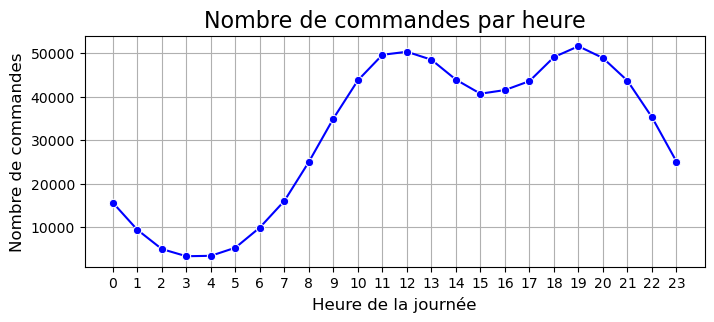

In [29]:

# Visualisation des commandes par heure

plt.figure(figsize=(8, 3))
sns.lineplot(x=orders_per_hour.index, y=orders_per_hour.values, marker='o', color='blue')

# Ajouter des labels et un titre
plt.title('Nombre de commandes par heure', fontsize=16)
plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Nombre de commandes', fontsize=12)
plt.xticks(range(0, 24))  # Affichage des heures sur l'axe x de 0 à 23
plt.grid(True)

# Afficher le graphique
plt.show()


## Nous avons le pic le plus important à 19h et des ventes élévées également enre 11h et 13h, Nous détaillerons l'analyse dans le rapport.

# 4) Quel est le produit qui réalise le plus de vente ?

In [30]:
dff.head()

,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month,Total_price,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.9,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [31]:

# Calculons la quantité totale achetée par produit

Quantity_per_product = dff.groupby('Product')['Quantity'].sum()
Quantity_per_product

Product
20in Monitor                   16516
27in 4K Gaming Monitor         24976
27in FHD Monitor               30200
34in Ultrawide Monitor         24796
AA Batteries (4-pack)         110540
AAA Batteries (4-pack)        124068
Apple Airpods Headphones       62644
Bose SoundSport Headphones     53828
Flatscreen TV                  19276
Google Phone                   22128
LG Dryer                        2584
LG Washing Machine              2664
Lightning Charging Cable       92868
Macbook Pro Laptop             18912
ThinkPad Laptop                16520
USB-C Charging Cable           95900
Vareebadd Phone                 8272
Wired Headphones               82228
iPhone                         27396
Name: Quantity, dtype: Int64

In [32]:

# Trouvons le produit avec le plus de ventes

best_selling_product = Quantity_per_product.idxmax()
best_selling_quantity = Quantity_per_product.max()

print("Le produit qui réalise le plus de ventes est :", best_selling_product ,"avec", best_selling_quantity ,"unités vendues.")


Le produit qui réalise le plus de ventes est : AAA Batteries (4-pack) avec 124068 unités vendues.


C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\1969679667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Quantity_per_product_sorted.values, y=Quantity_per_product_sorted.index, palette="viridis")


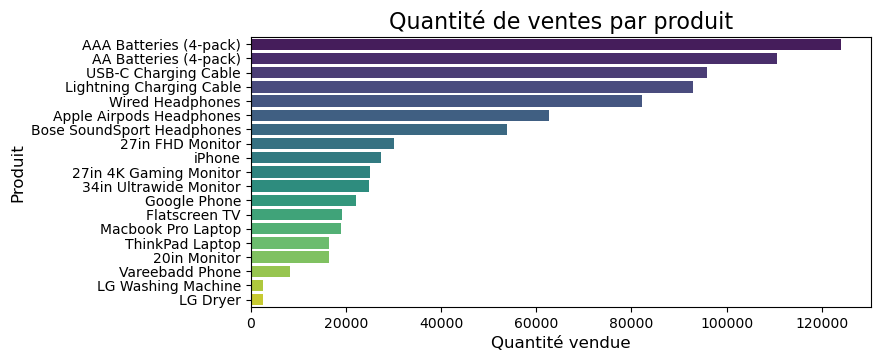

In [33]:

# Faisons un Tri des produits par quantité vendue pour une meilleure visualisation

Quantity_per_product_sorted = Quantity_per_product.sort_values(ascending=False)

# Création du graphique à barres horizontales
plt.figure(figsize=(8, 3.5))
sns.barplot(x=Quantity_per_product_sorted.values, y=Quantity_per_product_sorted.index, palette="viridis")
plt.title("Quantité de ventes par produit", fontsize=16)
plt.xlabel("Quantité vendue", fontsize=12)
plt.ylabel("Produit", fontsize=12)

# Afficher le graphique
plt.show()


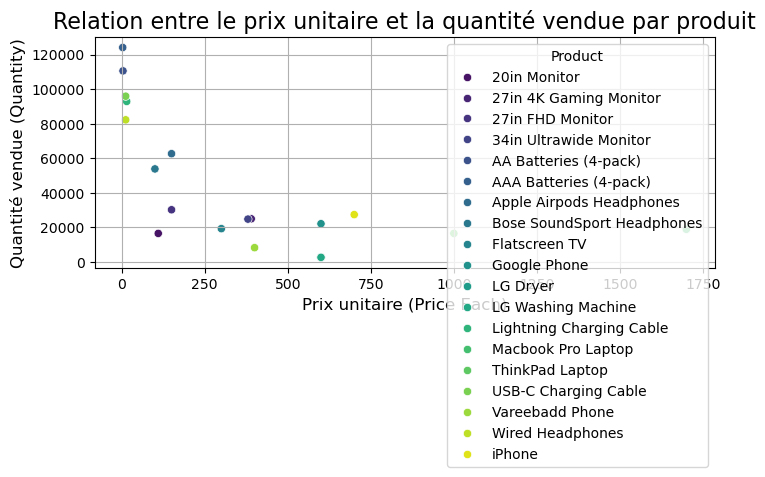

In [34]:

# Pour bien analyser, essayons de voir la relation entre le prix unitaire et la quantité vendu.

# Regrouper les données par produit ( quantité totale et prix moyen unitaire)
product_data = dff.groupby('Product').agg({'Quantity': 'sum', 'Price_Each': 'mean'}).reset_index()

# Créer un scatter plot
plt.figure(figsize=(8, 3))
sns.scatterplot(data=product_data, x='Price_Each', y='Quantity', hue='Product', palette='viridis')

# Ajouter des labels et un titre
plt.title('Relation entre le prix unitaire et la quantité vendue par produit', fontsize=16)
plt.xlabel('Prix unitaire (Price Each)', fontsize=12)
plt.ylabel('Quantité vendue (Quantity)', fontsize=12)
plt.grid(True)
plt.show()


In [35]:

# Calculons la corrélation

correlation = product_data['Price_Each'].corr(product_data['Quantity'])
correlation

-0.601443055993455

## les points suivent une tendance claire: une pente descendante, cela indique une relation inverse entre le prix unitaire et la quantité vendue (les produits plus chers se vendent moins).

## 5) Quelles sont les combinaisons de produits qui se vendent le plus

In [36]:
dff.head()

,Order_ID,Product,Quantity,Price_Each,Order_Date,Address,Month,Total_price,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.9,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [44]:

# Regroupons les produits par commande (Order_ID)

df_combined = dff.groupby('Order_ID')['Product'].apply(lambda x: ','.join(x)).reset_index()
df_combined.head()

,Order_ID,Product
0,141234,"iPhone,iPhone,iPhone,iPhone"
1,141235,"Lightning Charging Cable,Lightning Charging Ca..."
2,141236,"Wired Headphones,Wired Headphones,Wired Headph..."
3,141237,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,141238,"Wired Headphones,Wired Headphones,Wired Headph..."


In [50]:

# A présent essayons de ne conserver que les commandes avec plusieurs produits differents

from itertools import combinations

# Fonction pour générer des combinaisons de produits différents
def get_product_combinations(products):
    product_list = products.split(',')
    return list(combinations(sorted(set(product_list)), 2))  # set pour éviter les doublons dans une commande

# Appliquer la fonction pour chaque commande
df_combined['Product_Pairs'] = df_combined['Product'].apply(get_product_combinations)
df_combined.head()

,Order_ID,Product,Product_Pairs
0,141234,"iPhone,iPhone,iPhone,iPhone",[]
1,141235,"Lightning Charging Cable,Lightning Charging Ca...",[]
2,141236,"Wired Headphones,Wired Headphones,Wired Headph...",[]
3,141237,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon...",[]
4,141238,"Wired Headphones,Wired Headphones,Wired Headph...",[]


In [47]:

# A présent, comptons les combinaisons les plus fréquentes

from collections import Counter

# Initialiser un compteur pour les paires de produits
pair_counter = Counter()

# Compter les paires dans toutes les commandes
for pairs in df_combined['Product_Pairs']:
    pair_counter.update(pairs)

# Convertir le compteur en DataFrame pour une analyse facile
product_pair_counts = pd.DataFrame(pair_counter.items(), columns=['Product_Pair', 'Count'])
product_pair_counts.head()

,Product_Pair,Count
0,"(USB-C Charging Cable, Wired Headphones)",203
1,"(AA Batteries (4-pack), Apple Airpods Headphones)",70
2,"(Vareebadd Phone, Wired Headphones)",149
3,"(Google Phone, USB-C Charging Cable)",997
4,"(Bose SoundSport Headphones, Google Phone)",228


C:\Users\aubai\AppData\Local\Temp\ipykernel_86484\3975300477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product_Pair', data=product_pair_counts.head(10), palette='viridis')


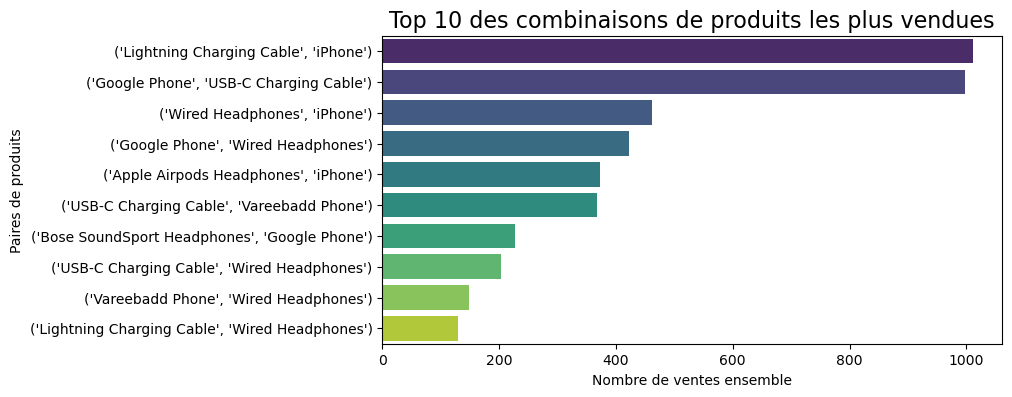

In [65]:
# Essayons à présent de visualiser tout ca 
# Nous allons afficher les 10 premiers grace au diagramme en barres

# Vérifier le type des colonnes
#print(product_pair_counts.dtypes)

# Convertissons la colonne Product_Pair en chaîne
product_pair_counts['Product_Pair'] = product_pair_counts['Product_Pair'].astype(str)

# Réinitialisons l'index au cas où
product_pair_counts = product_pair_counts.reset_index(drop=True)

# Visualisons les 10 combinaisons les plus fréquentes
plt.figure(figsize=(8, 4))
sns.barplot(x='Count', y='Product_Pair', data=product_pair_counts.head(10), palette='viridis')
plt.title('Top 10 des combinaisons de produits les plus vendues', fontsize=16)
plt.xlabel('Nombre de ventes ensemble')
plt.ylabel('Paires de produits')
plt.show()


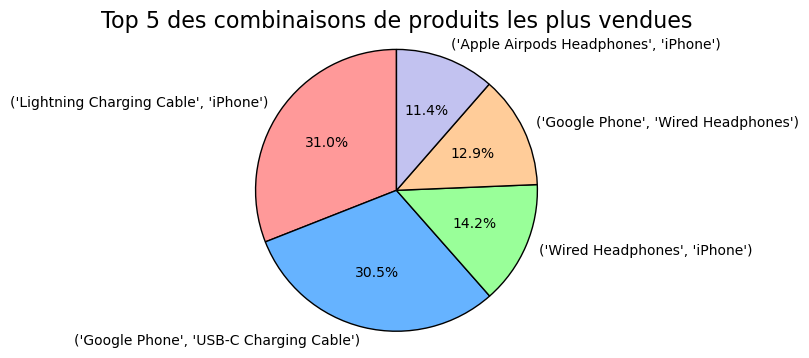

In [68]:

# Bien que nous avons déjà toutes les infos aver le barplot, Essayons un autre type de visualisation
# Observons comment se repartissent les 5 premieres combinaisons sur un diagramme circulaire

# Filtrons pour les 5 premières combinaisons seulement
import matplotlib.pyplot as plt

# Filtrer le top 5 des combinaisons de produits les plus vendues
top_5_product_pairs = product_pair_counts.head(5)

# Couleurs personnalisées pour des couleurs marquantes
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Créer le diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(top_5_product_pairs['Count'], labels=top_5_product_pairs['Product_Pair'], colors=colors, 
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Top 5 des combinaisons de produits les plus vendues', fontsize=16)
plt.show()
